In [1]:
from neuralforecast import NeuralForecast
from neuralforecast.models import TimesNet
from neuralforecast.utils import AirPassengersPanel

def prepare_seasonal_data():
    """Load the AirPassengers dataset for seasonal analysis."""
    return AirPassengersPanel

In [2]:
def train_timesnet(df):
    """Train a TimesNet model using 2D transformation logic."""
    model = TimesNet(
        h=12,
        input_size=36,
        top_k=3,
        num_kernels=16,
        hidden_size=64,
        encoder_layers=2,
        dropout=0.2,
        max_steps=1,
        random_seed=42,
    )    
    nf = NeuralForecast(models=[model], freq='M')
    nf.fit(df=df)
    return nf

# Workflow implementation
y_df = prepare_seasonal_data()
nf_timesnet = train_timesnet(y_df)

# Generate forecasts
forecast_timesnet = nf_timesnet.predict()

Seed set to 42
/Users/ben/anaconda3/envs/ml_timeseries/lib/python3.12/site-packages/neuralforecast/common/_base_model.py:537: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1)` was configured so validation will run after every batch.

  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MAE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 89.4 M | train
4 | enc_embedding  | DataEmbedding | 192    | train
5 | layer_norm     | LayerNorm     | 128    | train
6 | predict_linear | Linear        | 1.8 K  | train
7 | projection     | Linear        | 65     | train
------------------------------------

Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

`Trainer.fit` stopped: `max_steps=1` reached.
/Users/ben/anaconda3/envs/ml_timeseries/lib/python3.12/site-packages/utilsforecast/processing.py:378: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/ben/anaconda3/envs/ml_timeseries/lib/python3.12/site-packages/utilsforecast/processing.py:434: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |                                                                                                 …

/Users/ben/anaconda3/envs/ml_timeseries/lib/python3.12/site-packages/utilsforecast/processing.py:378: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/ben/anaconda3/envs/ml_timeseries/lib/python3.12/site-packages/utilsforecast/processing.py:434: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |                                                                                                 …

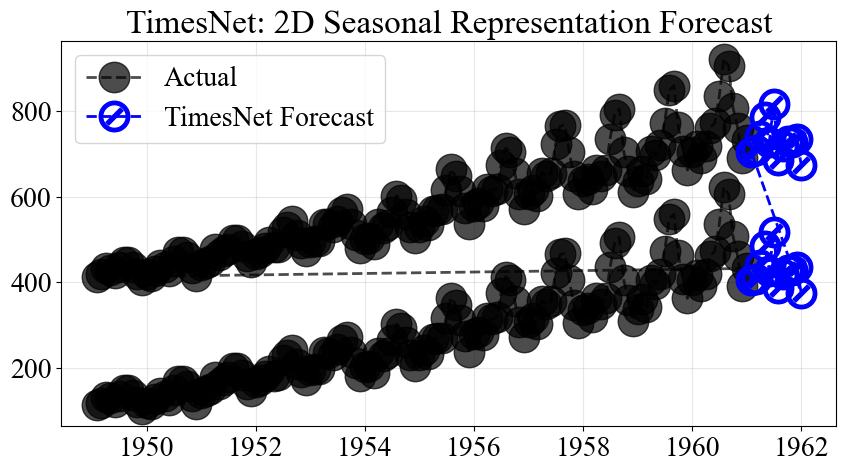

In [3]:
import matplotlib.pyplot as plt

# Forecast execution
Y_hat_df = nf_timesnet.predict()

# Visualization
def plot_timesnet_forecast(actual_df, forecast_df):
    """Plot the actual data vs TimesNet seasonal forecast."""
    plt.figure(figsize=(10, 5))
    plt.plot(actual_df['ds'], actual_df['y'], label='Actual', color='black', alpha=0.7)
    plt.plot(forecast_df['ds'], forecast_df['TimesNet'], label='TimesNet Forecast', color='blue', lw=2)
    plt.title("TimesNet: 2D Seasonal Representation Forecast")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

plot_timesnet_forecast(y_df, Y_hat_df)